<h1 style="text-align:center; font-size:36px;"><strong>EDA for Classification Project – Customer Churn Dataset</strong></h1>


# 1. Initial Setup & Data Overview

In [7]:
import numpy as np 
import pandas as pd 
from pandas_summary import DataFrameSummary

import seaborn as sns 
import matplotlib.pyplot as plt
from  scipy.stats import chi2_contingency, f_oneway
from math import log, e

import warnings
import random

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline
warnings.filterwarnings("ignore")

ImportError: cannot import name '_matplotlib_manages_backends' from 'IPython.core.pylabtools' (C:\Users\admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py)

In [3]:
df = pd.read_csv(r'C:\Users\admin\Desktop\PYTHON LEARNING\jupyter notebook practice\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns.tolist()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [7]:
df.drop('RowNumber',axis = 1 , inplace = True)

In [49]:
df.shape

(10000, 13)

# 2. Univariate Analysis

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
numeric_df = df.select_dtypes(include='number')
dfs = DataFrameSummary(numeric_df)
dfs.columns_stats

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
counts,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
uniques,10000,460,70,11,6382,4,2,2,9999,2
missing,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,numeric,numeric,numeric,numeric,numeric,bool,bool,numeric,bool


#### Check if the target class is imbanced

In [14]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

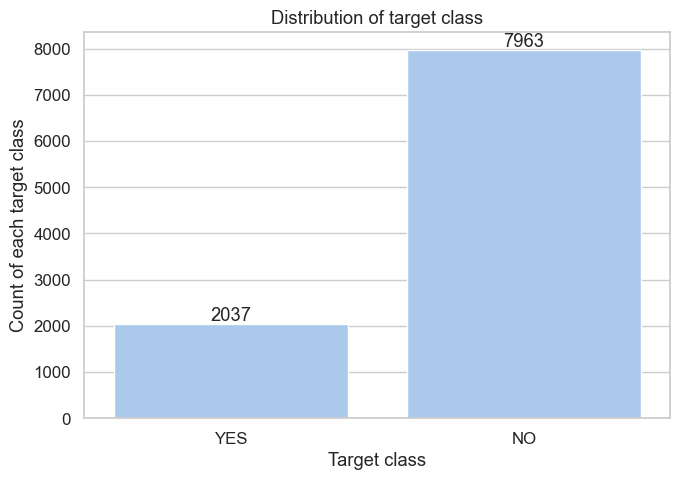

In [160]:
plt.figure(figsize = (7,5))
ax = sns.countplot(data = df,x = df['Exited'].map({1:'YES',0:'NO'}))
ax.bar_label(ax.containers[0])
plt.xlabel('Target class')
plt.ylabel('Count of each target class')
plt.title('Distribution of target class')
plt.tight_layout()
plt.show()

#### Checking impurity of y lable

In [47]:
from scipy.stats import entropy
ent = pd.value_counts(df['Exited'], normalize=True)
entropy(ent)

0.505489127326179

Entropy of the target variable is 0.505, which indicates a moderate level of impurity or uncertainty in the class distribution. This means the classes are not perfectly balanced or perfectly pure — there is some mix, but one class likely dominates slightly.

# 3. Bivariate Analysis

In [52]:
numeric_df.columns.tolist()

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [54]:
remove_col = ['HasCrCard', 'IsActiveMember', 'Exited']
num_df = numeric_df.drop(columns=remove_col)
num_df.columns.tolist()

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary']

In [57]:
cat_df = df.columns.difference(num_df.columns)
cat_df = df[cat_df]
cat_df.drop('Exited',axis = 1,inplace = True)
cat_df.columns.tolist()

['Gender', 'Geography', 'HasCrCard', 'IsActiveMember', 'Surname']

## Chie Square Test
### (For Categorical columns)

In [62]:
for col in cat_df.columns:
    contingency = pd.crosstab(cat_df[col], df['Exited'])
    
    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency)
        
        significance = "Yes" if p < 0.05 else "No"
        
        print(f"Column: {col}")
        print(f"  Test Statistic: {chi2:.4f}")
        print(f"  p-value       : {p:.4f}")
        print(f"  Statistically Significant?  {significance}\n")

Column: Gender
  Test Statistic: 112.9186
  p-value       : 0.0000
  Statistically Significant?  Yes

Column: Geography
  Test Statistic: 301.2553
  p-value       : 0.0000
  Statistically Significant?  Yes

Column: HasCrCard
  Test Statistic: 0.4713
  p-value       : 0.4924
  Statistically Significant?  No

Column: IsActiveMember
  Test Statistic: 242.9853
  p-value       : 0.0000
  Statistically Significant?  Yes

Column: Surname
  Test Statistic: 2786.4142
  p-value       : 0.9720
  Statistically Significant?  No



The features Gender, Geography, and IsActiveMember were found to be statistically significant (p < 0.05) based on the Chi-Square test of independence. This suggests that they have a meaningful association with the target variable and may play an important role in predicting outcomes.


**Statistically Significant Features (p < 0.05):**

- Gender
- Geography
- IsActiveMember


## ANOVA Test
### (For Numerical Columns)

In [64]:
for col in num_df.columns:

    group_0 = df[df['Exited'] == 0][col].dropna()
    group_1 = df[df['Exited'] == 1][col].dropna()
    
    f_stat, p = f_oneway(group_0, group_1)
    
    significance = "Yes" if p < 0.05 else "No"
    
    print(f"Column: {col}")
    print(f"  Test Statistic: {f_stat:.4f}")
    print(f"  p-value       : {p:.4f}")
    print(f"  Statistically Significant? {significance}\n")

Column: CustomerId
  Test Statistic: 0.3903
  p-value       : 0.5322
  Statistically Significant? No

Column: CreditScore
  Test Statistic: 7.3445
  p-value       : 0.0067
  Statistically Significant? Yes

Column: Age
  Test Statistic: 886.0633
  p-value       : 0.0000
  Statistically Significant? Yes

Column: Tenure
  Test Statistic: 1.9602
  p-value       : 0.1615
  Statistically Significant? No

Column: Balance
  Test Statistic: 142.4738
  p-value       : 0.0000
  Statistically Significant? Yes

Column: NumOfProducts
  Test Statistic: 22.9152
  p-value       : 0.0000
  Statistically Significant? Yes

Column: EstimatedSalary
  Test Statistic: 1.4633
  p-value       : 0.2264
  Statistically Significant? No



Based on the One-Way ANOVA test, the following numerical features were found to be statistically significant (p < 0.05) in relation to the target variable Exited. This indicates that the mean values of these features differ significantly between customers who exited and those who did not, making them potentially valuable for predictive modeling

**Statistically Significant Features (p < 0.05):**

- CreditScore
- Age
- Balance
- NumOfProducts

## 📈 Feature Significance Summary

We conducted statistical tests to identify which features have a meaningful association with the target variable `Exited`.

- **For categorical variables**, we used the **Chi-Square test of independence**.
- **For numerical variables**, we applied the **One-Way ANOVA test**.

### 🔹 Statistically Significant Categorical Features (Chi-Square Test)
These categorical variables showed a significant relationship (p < 0.05) with the target variable:

- `Gender`  
- `Geography`  
- `IsActiveMember`

### 🔹 Statistically Significant Numerical Features (One-Way ANOVA)
These numerical variables had significantly different means between exited and non-exited customers:

- `Age`  
- `Balance`
- `CreditScore` 
- `NumOfProducts`

> These features are strong candidates for inclusion in predictive models such as logistic regression, decision trees, or any supervised machine learning task focused on customer churn prediction.


# 4. Visual Analytics

In [66]:
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.1)
sns.despine()

### Categorical Features

### Target Distribution

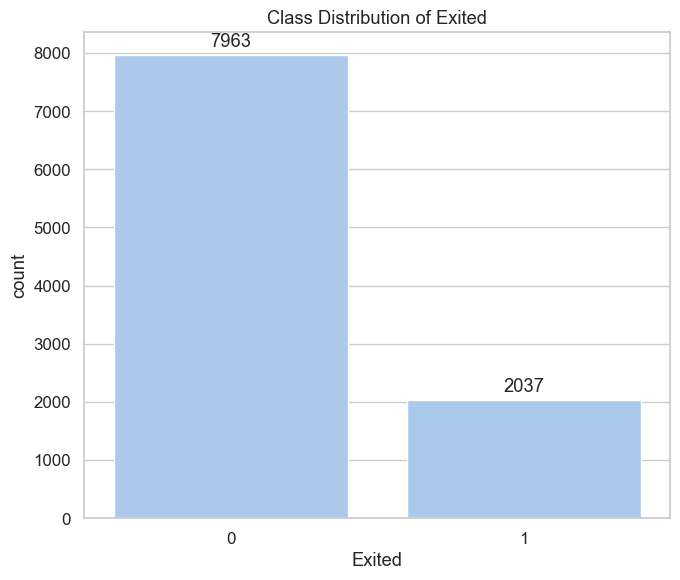

In [104]:
plt.figure(figsize = (7,6))
ax = sns.countplot(x="Exited", data=df)
ax.bar_label(ax.containers[0],label_type='edge', padding=3, fmt='%d')
plt.title("Class Distribution of Exited")
plt.tight_layout()
plt.show()

### Gender

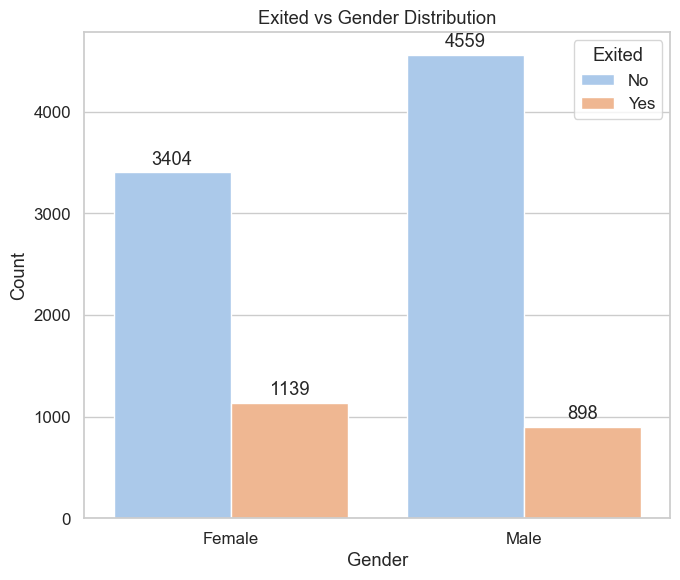

In [106]:
plt.figure(figsize = (7,6))
ax = sns.countplot(x="Gender", hue="Exited", data=df, palette="pastel")
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fmt='%d')
plt.title("Exited vs Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

### Geography

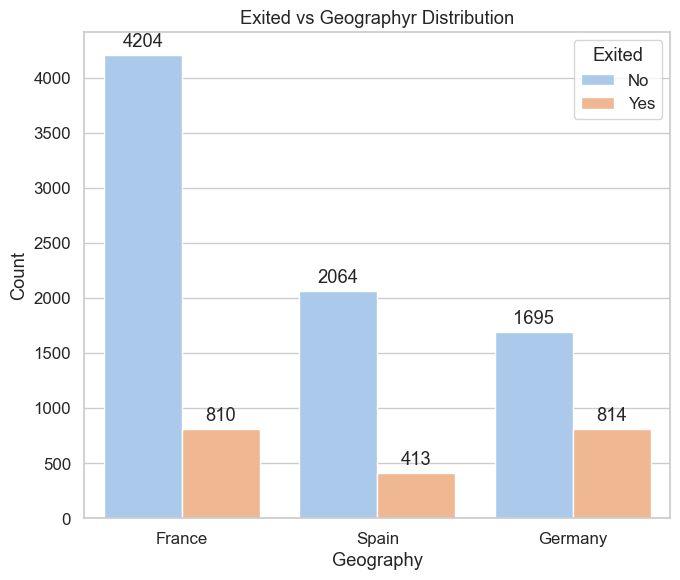

In [107]:
plt.figure(figsize = (7,6))
ax = sns.countplot(x="Geography", hue="Exited", data=df, palette="pastel")
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fmt='%d')
plt.title("Exited vs Geographyr Distribution")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

### IsActiveMemeber

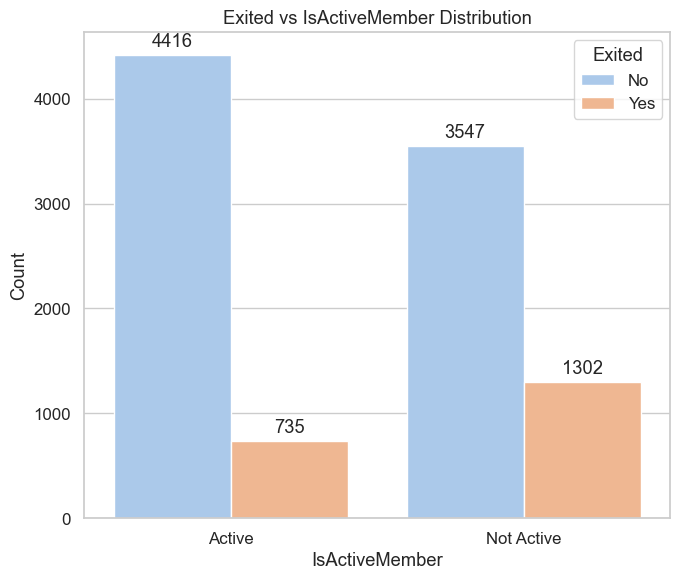

In [109]:
plt.figure(figsize = (7,6))
ax = sns.countplot(x=df["IsActiveMember"].map({0: "Not Active", 1: "Active"}), hue="Exited", data=df, palette="pastel")
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fmt='%d')
plt.title("Exited vs IsActiveMember Distribution")
plt.xlabel("IsActiveMember")
plt.ylabel("Count")
plt.legend(title="Exited", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

### Numerical Features

### Age

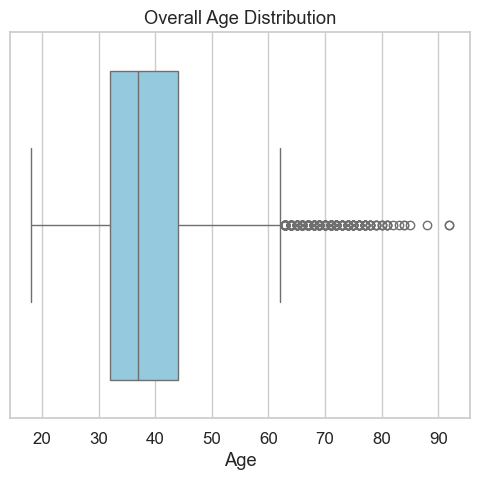

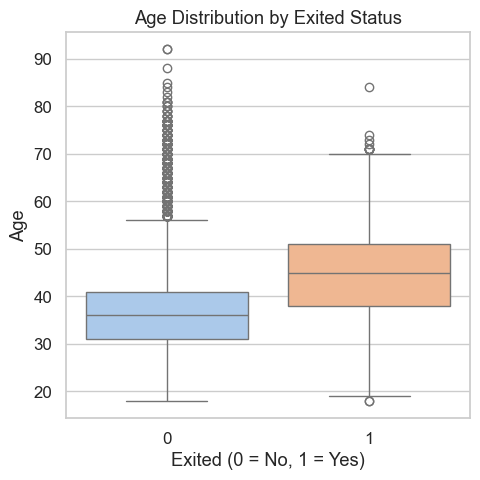

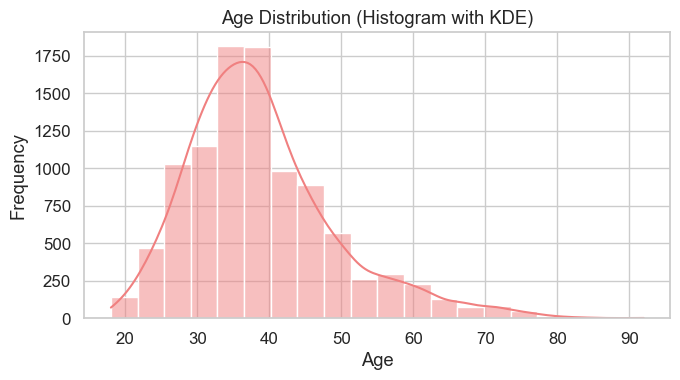

In [143]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df["Age"], color='skyblue')
plt.title("Overall Age Distribution")
plt.xlabel("Age")
plt.ylabel("") 
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(x="Exited", y="Age", data=df, palette="pastel")
plt.title("Age Distribution by Exited Status")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
sns.histplot(df['Age'], bins=20, kde=True, color='lightcoral')
plt.title("Age Distribution (Histogram with KDE)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Balance

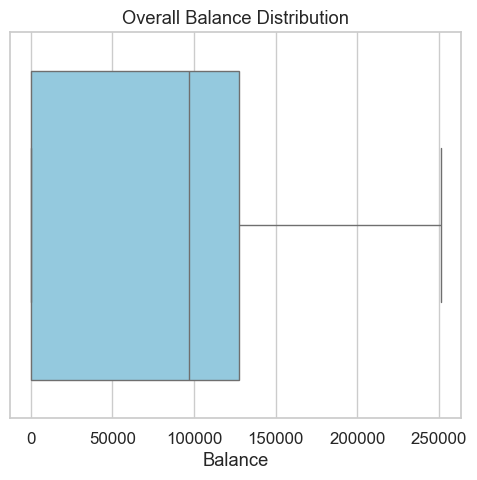

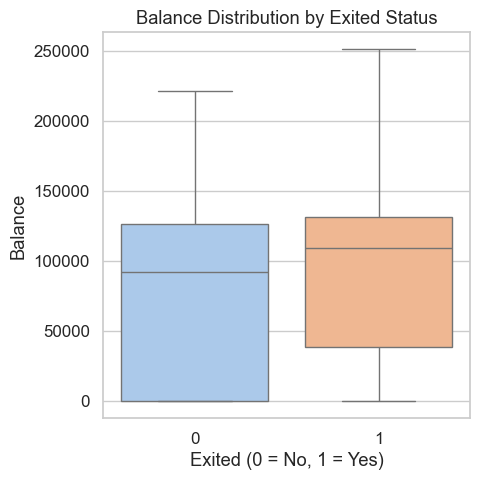

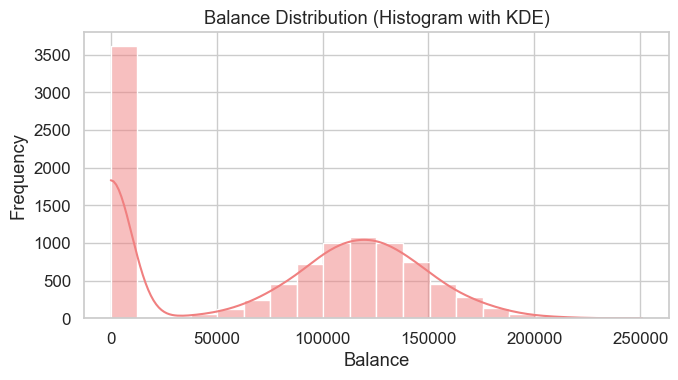

In [142]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df["Balance"], color='skyblue')
plt.title("Overall Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("") 
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(x="Exited", y="Balance", data=df, palette="pastel")
plt.title("Balance Distribution by Exited Status")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Balance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
sns.histplot(df['Balance'], bins=20, kde=True, color='lightcoral')
plt.title("Balance Distribution (Histogram with KDE)")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### CreditScore

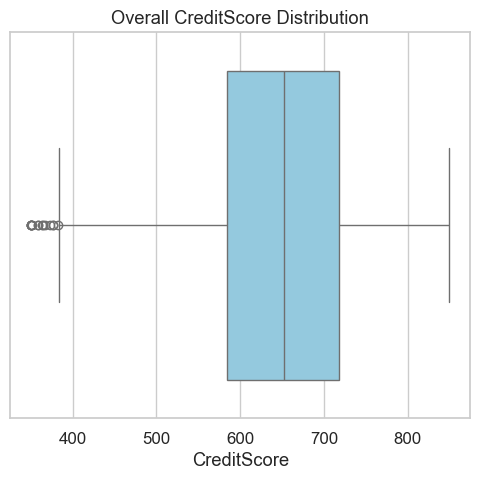

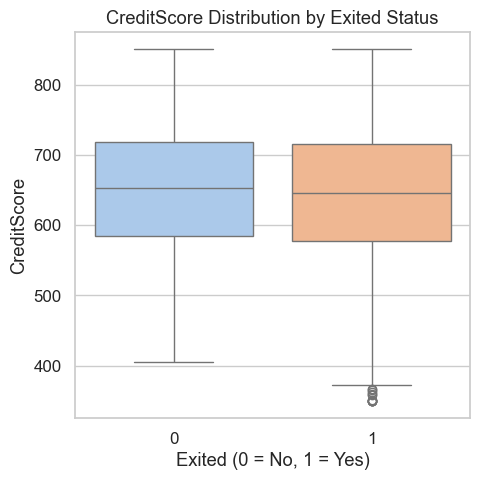

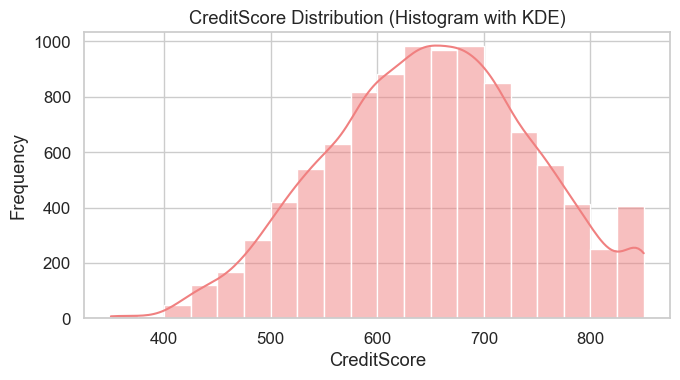

In [141]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df["CreditScore"], color='skyblue')
plt.title("Overall CreditScore Distribution")
plt.xlabel("CreditScore")
plt.ylabel("") 
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(x="Exited", y="CreditScore", data=df, palette="pastel")
plt.title("CreditScore Distribution by Exited Status")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("CreditScore")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
sns.histplot(df['CreditScore'], bins=20, kde=True, color='lightcoral')
plt.title("CreditScore Distribution (Histogram with KDE)")
plt.xlabel("CreditScore")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### NumOfProducts

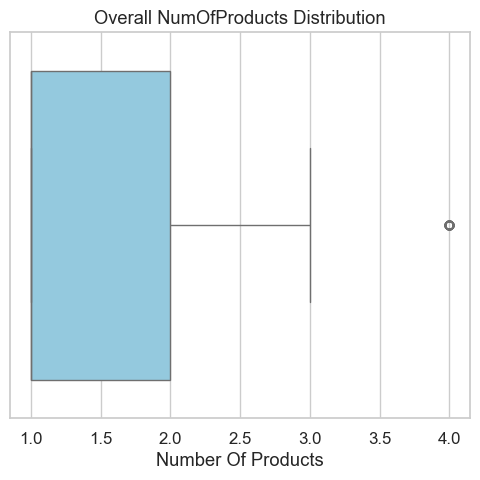

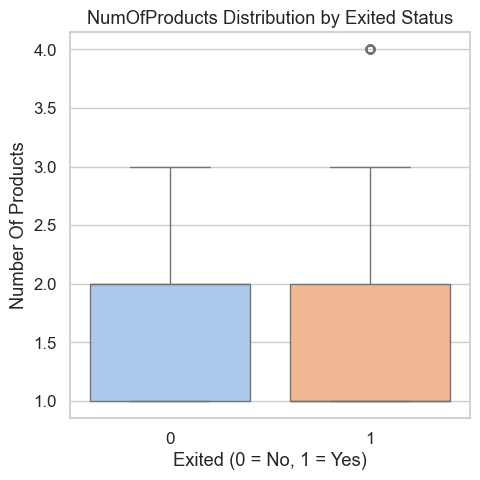

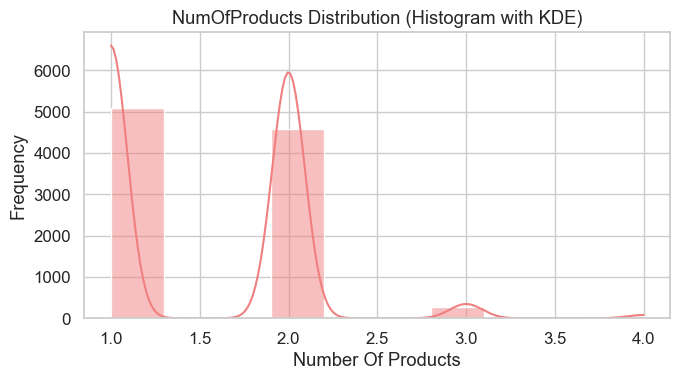

In [145]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df["NumOfProducts"], color='skyblue')
plt.title("Overall NumOfProducts Distribution")
plt.xlabel("Number Of Products")
plt.ylabel("") 
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(x="Exited", y="NumOfProducts", data=df, palette="pastel")
plt.title("NumOfProducts Distribution by Exited Status")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Number Of Products")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
sns.histplot(df['NumOfProducts'], bins=10, kde=True, color='lightcoral')
plt.title("NumOfProducts Distribution (Histogram with KDE)")
plt.xlabel("Number Of Products")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 5. Data Pre-processing

### A. Handling Missing Values

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


#### After inspecting the dataset, we found that there are **no missing values** in any column.  
#### Therefore, we are **skipping the missing value treatment step** in the data preprocessing pipeline.

> ✅ This ensures the integrity of our dataset and allows us to move directly to outlier detection and feature analysis.

### B. Outlier Detection

In [151]:
y = df['Exited']

x = df.drop(['Exited', 'CustomerId', 'Surname',
                   'Geography', 'Gender'], axis = 1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [152]:
from sklearn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor()
yhat = model.fit_predict(x)

In [153]:
# seect all rows that are outliers
outliers = yhat == -1

# select all rows that are not outliers
mask = yhat != -1

In [154]:
# Outliers
pd.concat([x.iloc[outliers, :], y.iloc[outliers]], axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
343,543,22,8,0.00,2,0,0,127587.22,0
520,850,35,1,211774.31,1,1,0,188574.12,1
537,686,34,9,0.00,2,1,0,127569.80,0
1533,850,37,3,212778.20,1,0,1,69372.88,0
1791,702,35,8,14262.80,2,1,0,54689.16,0
1830,506,37,5,0.00,2,1,1,127543.81,0
1856,527,29,2,27755.97,1,1,0,97468.44,1
2092,655,38,3,250898.09,3,0,1,81054.00,1
2709,592,37,4,212692.97,1,0,0,176395.02,0
3247,791,25,7,0.00,1,1,0,89666.28,0


In [155]:
final_df = df.iloc[mask, :]
final_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [157]:
final_df.shape

(9971, 13)

# 🧠 EDA for Classification Project : Conclusion  
## Dataset: Customer Churn

This project focused on performing a comprehensive **Exploratory Data Analysis (EDA)** on a customer churn dataset, with the goal of identifying patterns and significant features that influence customer churn behavior.

---

## ✅ Summary of Steps

### 1. 🚀 Initial Setup & Data Overview
- Imported essential libraries: `pandas`, `numpy`, `seaborn`, `matplotlib`
- Loaded the **Customer Churn dataset**
- Explored basic structure using `.info()`, `.describe()`, and `.head()`
- Checked column types and understood variable categories (categorical vs numerical)
- Reviewed the target variable `Exited` for class balance
  
### 2. 📊 Univariate Analysis
- Explored individual distributions of key features  
- Assessed value counts, skewness, and class balance
  
### 3. 🔗 Bivariate Statistical Testing
- Applied **Chi-Square Test** (categorical vs `Exited`)  
- Applied **ANOVA Test** (numerical vs `Exited`)  
- ✅ Selected only statistically significant features for further analysis
  
### 4. 📈 Visual Analytics (Seaborn)
- Clean and modern charts using `sns.set_theme()`  
- Grouped bar plots for categorical features vs `Exited`  
- Boxplots and histograms for numerical feature variation by `Exited`
  
### 5. 🚨 Missing Value Handling & Outlier Detection
- Checked for missing values  
- ✅ No missing values found — skipped imputation
- Used **Local Outlier Factor (LOF)** on numerical features  
- Identified and removed rows with extreme behavior  
- Resulted in a more stable, high-quality dataset



---

## 📌 Key Insights

- ✅ **Gender**, **Geography**, and **IsActiveMember** were **statistically significant** categorical predictors of churn  
- 📉 Customers with **higher Age** and **lower Balance** showed higher churn risk  
- 🧠 Visual analysis aligned well with statistical test outcomes, increasing trust in the selected features

---

## 🏁 Final Notes

This EDA phase provides a **robust foundation for predictive modeling**.  
The cleaned and statistically validated dataset is now ready for training classification models such as:

- Logistic Regression  
- Random Forest  
- XGBoost  
- Gradient Boosting

> ✅ A well-executed EDA ensures data is **relevant, interpretable, and ready for machine learning**.

---


In [3]:
!pip freeze > requirements.txt
